# Tutorial: Ridge Regression (L2 Regularization)

Di subchapter sebelumnya, kita memahami bahwa model yang terlalu kompleks (varians tinggi) akan *overfitting*. Pertanyaannya sekarang adalah: **bagaimana cara kita mengontrol kompleksitas model secara langsung?**

**Ridge Regression** adalah salah satu jawaban yang paling populer. Ini adalah varian dari Regresi Linear yang menambahkan sebuah "penalti" untuk mencegah koefisien model menjadi terlalu besar. Dengan "menjinakkan" koefisien, Ridge memaksa model untuk menjadi lebih sederhana dan kurang sensitif terhadap noise, sehingga mengurangi overfitting.

---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan intuisi di balik Ridge Regression dan L2 Regularization.
* Mengimplementasikan `Ridge` dari Scikit-learn dalam sebuah `Pipeline`.
* Memahami peran hyperparameter `alpha` dalam mengontrol kekuatan regularisasi.
* Memvisualisasikan bagaimana Ridge Regression dapat "melunakkan" model yang overfitting.


---
### 2. Masalah: Model yang Overfitting

Mari kita ciptakan kembali skenario overfitting kita dari Chapter 5. Kita akan sengaja melatih model Regresi Polinomial dengan derajat yang sangat tinggi pada data non-linear kita.


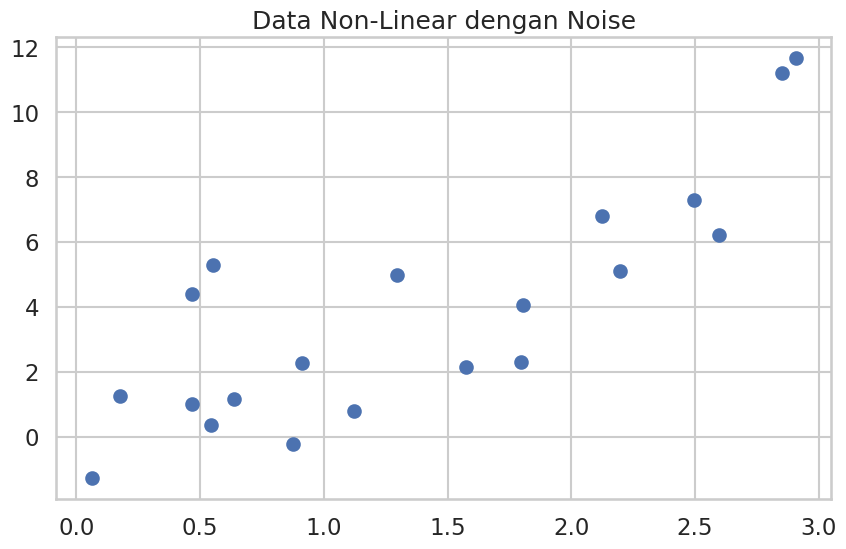

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Atur opsi numpy untuk output yang lebih bersih
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Data non-linear
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + 2 * np.random.randn(m, 1)

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Data Non-Linear dengan Noise")
plt.show()

Sekarang, mari kita paksakan model polinomial derajat 10 pada data ini. Kita juga akan menambahkan `StandardScaler` ke dalam pipeline, karena regularisasi bekerja paling baik pada data yang sudah diskalakan.


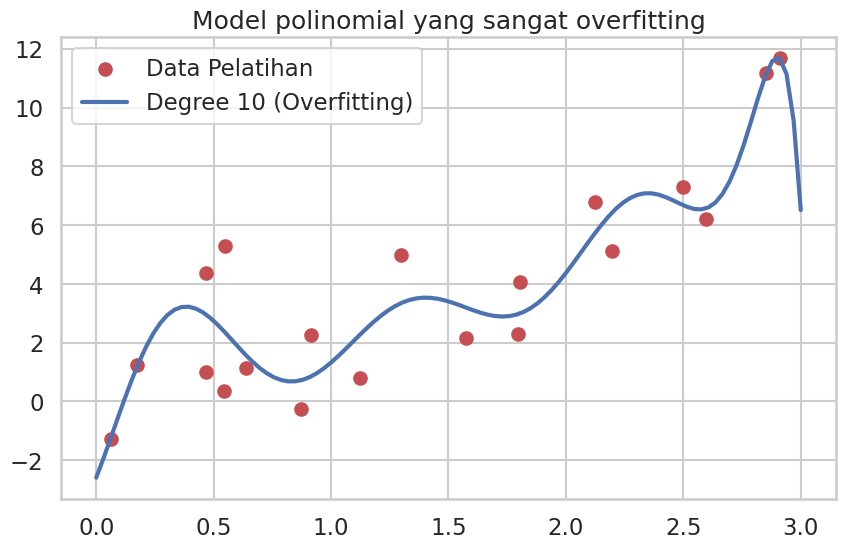

[[     18.41      79.96    -825.02   -5717.55   63497.44 -226542.45
   413923.23 -417873.60  221966.47  -48523.39]]


In [18]:
overfitting_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

overfitting_model.fit(X, y)

# fungsi untuk memvisualisasikan prediksi
def plot_model_predictions(model, label):
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_pred = model.predict(X_new)
    plt.plot(X_new, y_new_pred, label=label, linewidth=3)

# visualisasi model yang overfitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='r', label="Data Pelatihan")
plot_model_predictions(overfitting_model, "Degree 10 (Overfitting)")
plt.title('Model polinomial yang sangat overfitting')
plt.legend()
plt.show()

print(overfitting_model.named_steps['lin_reg'].coef_)

Seperti yang kita lihat, garis prediksinya berkelok-kelok secara liar untuk mencoba menangkap setiap titik data. Ini adalah model dengan varians tinggi.

---
### 3. Solusi: Intuisi di Balik Ridge Regression

Apa yang menyebabkan model di atas berkelok-kelok? **Koefisien yang sangat besar**. Model memberikan bobot yang sangat tinggi (baik positif maupun negatif) pada fitur-fitur polinomialnya untuk bisa "membengkok" secara tajam.

**Ridge Regression** mencegah ini dengan menambahkan "biaya" atau "penalti" pada fungsi kerugian (*loss function*) model.

* **Regresi Linear Biasa:** Tujuannya hanya `Minimalkan Error`.
* **Ridge Regression:** Tujuannya adalah `Minimalkan Error + alpha * Σ(koefisien)²`.

Istilah `Σ(koefisien)²` ini disebut **L2 norm**. Dengan menambahkan penalti ini, Ridge berkata kepada model: "Silakan minimalkan error, TAPI kamu akan dihukum jika kamu menggunakan koefisien yang terlalu besar. Jadi, carilah keseimbangan."


---
### 4. Implementasi dengan `Ridge` dari Scikit-learn

Menggunakan Ridge di Scikit-learn sangat mudah. Kita hanya perlu mengganti `LinearRegression` dengan `Ridge` di dalam pipeline kita.

`Ridge` memiliki hyperparameter penting:
* **`alpha`**: Mengontrol seberapa kuat penalti regularisasi.
  * `alpha = 0`: Sama seperti Regresi Linear biasa (tidak ada penalti).
  * `alpha` kecil (misal, 0.1): Regularisasi lemah.
  * `alpha` besar (misal, 100): Regularisasi sangat kuat, model akan dipaksa menjadi sangat sederhana (mendekati garis lurus).

In [19]:
ridge_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge(alpha=1))
])

ridge_model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly_features', ...), ('std_scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",10
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


### 5. Membandingkan Hasilnya Secara Visual

Mari kita plot prediksi dari model overfitting dan model Ridge pada grafik yang sama.

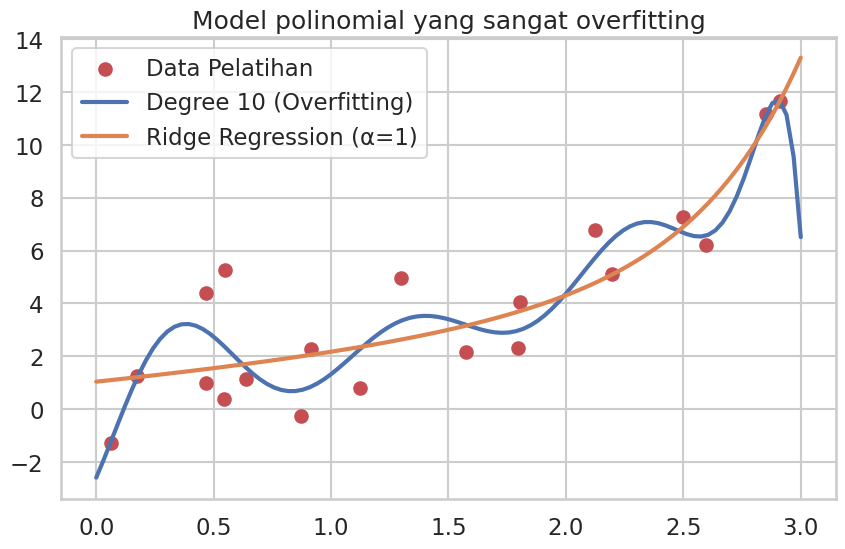

[[     18.41      79.96    -825.02   -5717.55   63497.44 -226542.45
   413923.23 -417873.60  221966.47  -48523.39]]
[0.85 0.35 0.32 0.28 0.24 0.21 0.20 0.21 0.24 0.29]


In [22]:
# visualisasi model yang overfitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='r', label="Data Pelatihan")
plot_model_predictions(overfitting_model, "Degree 10 (Overfitting)")
plot_model_predictions(ridge_model, "Ridge Regression (α=1)")
plt.title('Model polinomial yang sangat overfitting')
plt.legend()
plt.show()

print(overfitting_model.named_steps['lin_reg'].coef_)
print(ridge_model.named_steps['ridge_reg'].coef_)

**Analisis:**

Luar biasa! Perhatikan bagaimana garis prediksi Ridge (Orange) jauh lebih "tenang" dan lebih masuk akal. Ia tidak lagi mencoba mengejar setiap titik noise. Ia menangkap tren umum dari data tanpa berkelok-kelok secara liar. Ini adalah model yang jauh lebih mungkin untuk **menggeneralisasi** dengan baik pada data baru.

### 6. Efek dari `alpha` yang Berbeda

Mari kita lihat bagaimana perubahan `alpha` memengaruhi kompleksitas model.


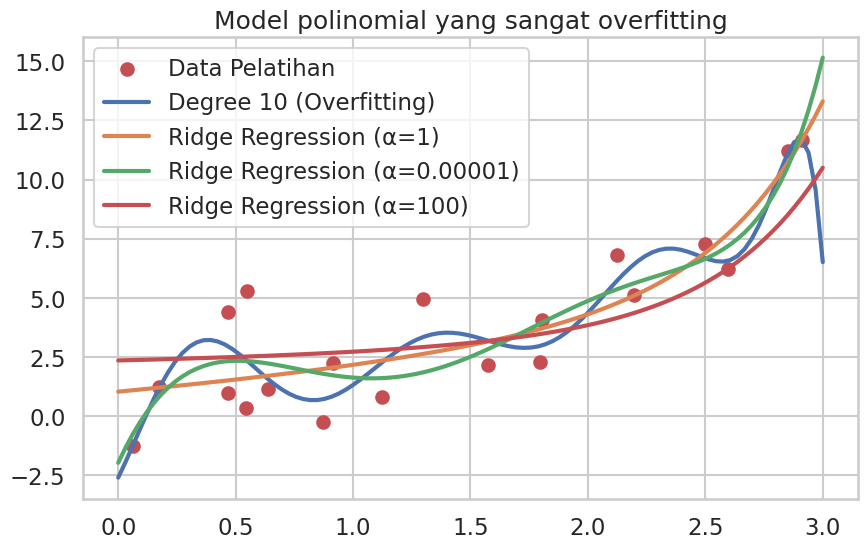

[[     18.41      79.96    -825.02   -5717.55   63497.44 -226542.45
   413923.23 -417873.60  221966.47  -48523.39]]
[0.85 0.35 0.32 0.28 0.24 0.21 0.20 0.21 0.24 0.29]
[  19.51 -100.51  171.51  -59.15  -69.60   10.75   35.95    5.53  -19.96
    9.33]
[0.22 0.22 0.22 0.21 0.21 0.20 0.20 0.19 0.19 0.19]


In [24]:
ridge_alpha_low = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge(alpha=0.00001))
])
ridge_alpha_high = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge(alpha=100))
])

ridge_alpha_low.fit(X, y)
ridge_alpha_high.fit(X, y)

# visualisasi model yang overfitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='r', label="Data Pelatihan")
plot_model_predictions(overfitting_model, "Degree 10 (Overfitting)")
plot_model_predictions(ridge_model, "Ridge Regression (α=1)")
plot_model_predictions(ridge_alpha_low, "Ridge Regression (α=0.00001)")
plot_model_predictions(ridge_alpha_high, "Ridge Regression (α=100)")
plt.title('Model polinomial yang sangat overfitting')
plt.legend()
plt.show()

print(overfitting_model.named_steps['lin_reg'].coef_)
print(ridge_model.named_steps['ridge_reg'].coef_)
print(ridge_alpha_low.named_steps['ridge_reg'].coef_)
print(ridge_alpha_high.named_steps['ridge_reg'].coef_)

**Observasi:**
* **Alpha sangat kecil (`1e-5`):** Garisnya hampir identik dengan model overfitting. Regularisasinya terlalu lemah.
* **Alpha sedang (`1`):** Keseimbangan yang baik, kurvanya mulus.
* **Alpha sangat besar (`100`):** Garisnya hampir lurus. Regularisasinya terlalu kuat sehingga "membunuh" semua kompleksitas model (menyebabkan underfitting).

Menemukan nilai `alpha` yang optimal adalah bagian dari proses *hyperparameter tuning*.


### Kesimpulan

* **Ridge Regression (L2)** adalah teknik regularisasi yang kuat untuk memerangi overfitting.
* Cara kerjanya adalah dengan menambahkan penalti pada **kuadrat besarnya koefisien**.
* Hyperparameter **`alpha`** mengontrol kekuatan regularisasi, menciptakan tradeoff antara kesederhanaan dan kecocokan dengan data.

**Selanjutnya:**
Di subchapter berikutnya, kita akan belajar tentang teknik regularisasi lain yang sangat populer: **Lasso Regression (L1 Regularization)**, yang memiliki satu properti menarik yang tidak dimiliki Ridge.
